In [2]:
import pandas as pd


In [15]:

df = pd.read_csv('/content/drive/MyDrive/경정데이터공모전/민규/제출 파일/데이터/18-24 결과통합 표준화.csv')
df

,tms_6_avg_strt_tm,racer_age,tms_6_high_rank_ratio,tms_6_avg_scr,wght,high_rate,boat_high_rank_ratio,mm_6_race_tcnt,mot_high_rank_ratio,mm_6_1_race_high_rank_ratio,...,mot_bf_avg,race_reg_no,race_id,racer_grd_cd,sex_cd,boat_no,motor_no,rank123,rank12,high_rank
0,-0.529999,-1.151385,0.497917,0.336128,-0.094072,0.000000,0.878352,-0.780236,0.302678,1.199250,...,0.142494,1,2018_1_1_1,2,0,7,15,361,36,0
1,-1.165998,0.474100,-0.268308,0.439847,0.470360,0.000000,-1.241580,-0.041065,0.576802,-0.727772,...,-1.567435,2,2018_1_1_1,2,0,101,34,361,36,0
2,1.377997,1.083657,-0.895219,-1.185091,1.034793,0.000000,1.591600,-1.273017,0.114218,1.199250,...,-0.498729,3,2018_1_1_1,4,0,6,42,361,36,1
3,1.377997,1.286842,-0.268308,-0.424481,-1.787370,0.000000,-0.667019,-0.041065,-1.102205,0.428441,...,0.997459,4,2018_1_1_1,3,0,109,156,361,36,0
4,-0.529999,-0.541828,-1.011314,-0.954603,1.034793,0.000000,-0.805706,0.205325,-1.419160,-1.371398,...,1.424941,5,2018_1_1_1,3,0,18,16,361,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47839,0.944497,0.314918,-2.139561,-1.042469,1.797902,-1.736218,-1.102988,0.114520,-0.081272,-0.977787,...,0.223607,2,2024_33_3_15,3,0,32,95,145,14,0
47840,0.205325,0.472377,0.353786,1.205594,-0.237459,0.859014,1.124544,0.286299,0.540457,0.152603,...,0.223607,3,2024_33_3_15,1,0,28,28,145,14,0
47841,-2.012189,-1.732051,0.095466,0.578583,0.169613,0.252651,-0.456285,0.458079,-0.891958,-0.977787,...,-0.447214,4,2024_33_3_15,2,0,53,13,145,14,1
47842,0.944497,0.944755,0.454867,0.853856,0.373149,1.198577,-1.081431,1.488756,1.442574,1.497767,...,-1.788854,5,2024_33_3_15,1,0,17,66,145,14,0


In [16]:
df=df.drop(columns=['race_id','rank123','rank12','boat_no','motor_no'])

In [17]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score


In [6]:
# 가정: df는 이미 로드된 Pandas DataFrame이며, 타겟 변수는 'target'이라는 열에 저장되어 있다고 가정합니다.

# 특성과 타겟 변수 분리
X = df.drop(columns=['high_rank'])  # 특성
y = df['high_rank']  # 타겟 변수

# 데이터셋을 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화
#scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 랜덤 포레스트 모델링
model = RandomForestClassifier(random_state=42)
#model.fit(X_train_scaled, y_train)
model.fit(X_train, y_train)

# 훈련 세트의 정확도 및 F1 스코어
# train_accuracy = model.score(X_train_scaled, y_train)
# train_f1 = f1_score(y_train, model.predict(X_train_scaled), average='weighted')
train_accuracy = model.score(X_train, y_train)
train_f1 = f1_score(y_train, model.predict(X_train), average='weighted')

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Training F1 Score: {train_f1:.2f}')

# 테스트 세트 예측
# y_pred = model.predict(X_test_scaled)
y_pred = model.predict(X_test)

# 테스트 세트의 정확도 및 F1 스코어
test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Test Accuracy: {test_accuracy:.2f}')
print(f'Test F1 Score: {test_f1:.2f}')

# 상세한 성능 보고서
print(classification_report(y_test, y_pred))

Training Accuracy: 1.00
Training F1 Score: 1.00
Test Accuracy: 0.79
Test F1 Score: 0.77
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      6376
           1       0.76      0.52      0.62      3193

    accuracy                           0.79      9569
   macro avg       0.78      0.72      0.73      9569
weighted avg       0.78      0.79      0.77      9569



                        Feature  Importance
18                  race_reg_no    0.093821
8           mot_high_rank_ratio    0.071129
3                 tms_6_avg_scr    0.065907
5                     high_rate    0.060069
2         tms_6_high_rank_ratio    0.060045
17                   mot_bf_avg    0.054510
11  mm_6_3_race_high_rank_ratio    0.053200
9   mm_6_1_race_high_rank_ratio    0.052871
0             tms_6_avg_strt_tm    0.052552
6          boat_high_rank_ratio    0.052506
7                mm_6_race_tcnt    0.051358
1                     racer_age    0.051119
12  mm_6_4_race_high_rank_ratio    0.050502
10  mm_6_2_race_high_rank_ratio    0.050302
4                          wght    0.050106
13  mm_6_5_race_high_rank_ratio    0.049815
14  mm_6_6_race_high_rank_ratio    0.047077
19                 racer_grd_cd    0.016962
16                            F    0.011722
20                       sex_cd    0.004425
15             dptre_tm_minutes    0.000000


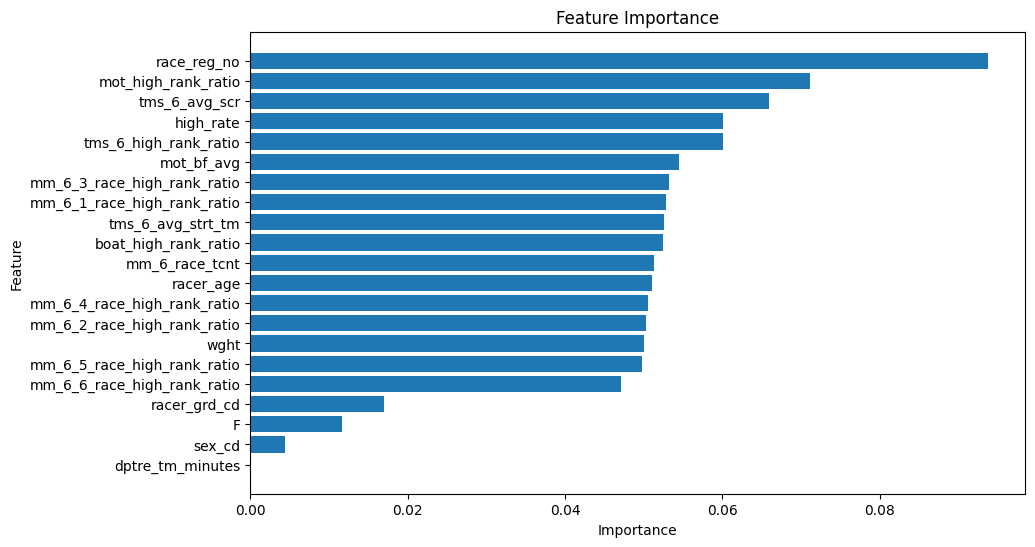

In [7]:
import matplotlib.pyplot as plt

# 변수 중요도 확인
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# 중요도 순서대로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 변수 중요도 출력
print(importance_df)

# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # 중요도에 따라 높은 순서가 위로 오도록 설정
plt.show()

In [ ]:
pip install optuna scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.2 MB/s eta 0:00:00


In [36]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.9 MB/s eta 0:00:00


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, classification_report
import joblib  # 모델 저장을 위한 라이브러리
import optuna

In [ ]:
# 목적 함수 정의 (Precision 최적화)
def objective(trial):
    # 하이퍼파라미터 검색 범위 설정
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2',None])

    # 모델 생성 및 학습
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Precision 계산
    precision = precision_score(y_test, y_pred)
    return precision

# Optuna Study 생성 및 최적화 실행
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# 최적의 하이퍼파라미터 출력
print('Best hyperparameters: ', study.best_params)
print('Best precision: ', study.best_value)


[I 2024-09-01 16:30:16,996] A new study created in memory with name: no-name-4c3600c6-669b-4ab6-a5c3-b1e9b9660308
[I 2024-09-01 16:31:05,571] Trial 0 finished with value: 0.6872451951077461 and parameters: {'n_estimators': 287, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 20, 'max_features': 'log2'}. Best is trial 0 with value: 0.6872451951077461.
[I 2024-09-01 16:31:57,051] Trial 1 finished with value: 0.7370843989769821 and parameters: {'n_estimators': 235, 'max_depth': 28, 'min_samples_split': 16, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.7370843989769821.
[I 2024-09-01 16:32:34,763] Trial 2 finished with value: 0.6982570806100218 and parameters: {'n_estimators': 196, 'max_depth': 15, 'min_samples_split': 12, 'min_samples_leaf': 17, 'max_features': 'log2'}. Best is trial 1 with value: 0.7370843989769821.
[I 2024-09-01 16:34:21,169] Trial 3 finished with value: 0.6986492780624126 and parameters: {'n_estimators': 109, 'max_depth': 22

Best hyperparameters:  {'n_estimators': 118, 'max_depth': 21, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2'}
Best precision:  0.7652495378927912


RandomForestClassifier(max_depth=21, max_features='log2', min_samples_leaf=2,
                       n_estimators=118, random_state=42)

In [ ]:

# 최적의 모델 생성 및 저장
best_model = RandomForestClassifier(
    n_estimators=study.best_params['n_estimators'],
    max_depth=study.best_params['max_depth'],
    min_samples_split=study.best_params['min_samples_split'],
    min_samples_leaf=study.best_params['min_samples_leaf'],
    max_features=study.best_params['max_features'],
    random_state=42
)

best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=21, max_features='log2', min_samples_leaf=2,
                       n_estimators=118, random_state=42)

In [ ]:
# 모델 저장
joblib.dump(best_model, '/content/drive/MyDrive/경정데이터공모전/민규/모델/best_random_forest_model.pkl')
print("Best model saved as 'best_random_forest_model.pkl'")

Best model saved as 'best_random_forest_model.pkl'


In [10]:
best_model = joblib.load('/content/drive/MyDrive/경정데이터공모전/민규/모델/best_random_forest_model.pkl')

# 테스트 데이터에 대한 예측
y_pred = best_model.predict(X_test)

# Classification Report 출력
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85      6376
           1       0.77      0.52      0.62      3193

    accuracy                           0.79      9569
   macro avg       0.78      0.72      0.73      9569
weighted avg       0.78      0.79      0.77      9569



                        Feature  Importance
18                  race_reg_no    0.109238
8           mot_high_rank_ratio    0.074294
3                 tms_6_avg_scr    0.065663
2         tms_6_high_rank_ratio    0.061335
5                     high_rate    0.060916
17                   mot_bf_avg    0.053672
11  mm_6_3_race_high_rank_ratio    0.051829
9   mm_6_1_race_high_rank_ratio    0.051633
10  mm_6_2_race_high_rank_ratio    0.050418
6          boat_high_rank_ratio    0.050369
0             tms_6_avg_strt_tm    0.050310
1                     racer_age    0.049733
7                mm_6_race_tcnt    0.049694
12  mm_6_4_race_high_rank_ratio    0.049113
13  mm_6_5_race_high_rank_ratio    0.048513
4                          wght    0.048254
14  mm_6_6_race_high_rank_ratio    0.046133
19                 racer_grd_cd    0.016393
16                            F    0.008998
20                       sex_cd    0.003491
15             dptre_tm_minutes    0.000000


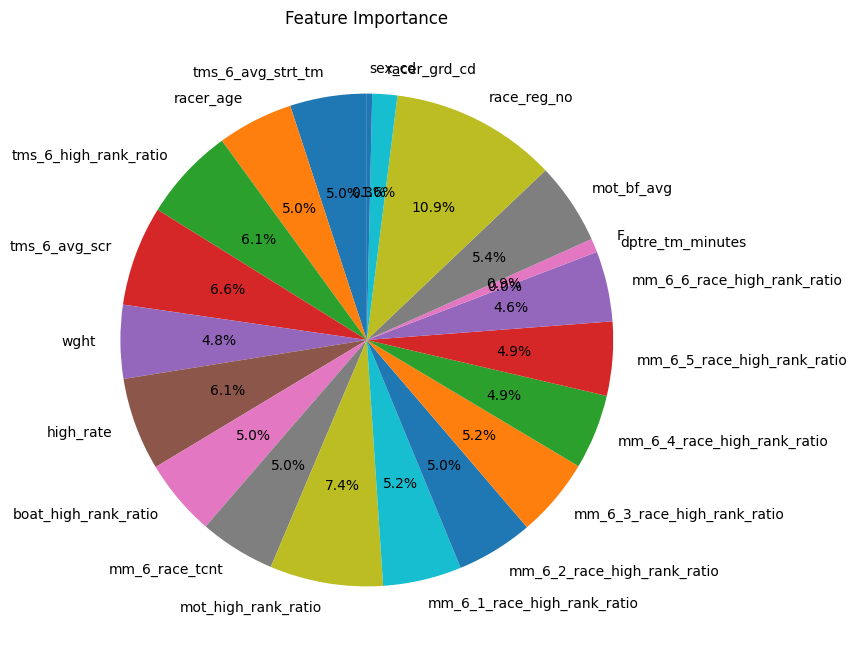

In [14]:
# prompt: best_model.feature_importances_ 원형 그래프로 시각화

import matplotlib.pyplot as plt

# 변수 중요도 가져오기
importances = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# 중요도 순서대로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 변수 중요도 출력
print(importance_df)


# 원형 그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(importances, labels=features, autopct='%1.1f%%', startangle=90)
plt.title('Feature Importance')
plt.show()


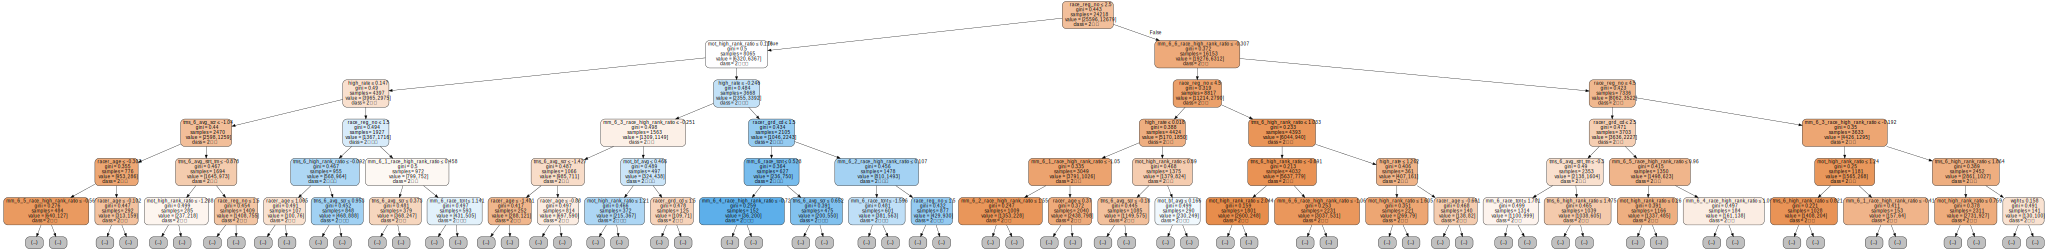

In [33]:
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt

# 특정 트리 선택 (예: 첫 번째 트리)
tree = best_model.estimators_[0]  # RandomForest에서 첫 번째 트리를 선택

# 트리 시각화를 위한 Graphviz 형식으로 변환
dot_data = export_graphviz(tree,
                           out_file=None,
                           feature_names=X.columns, # 특징 이름 입력
                           class_names=['2등 밖', '2등 이내'], # 클래스 이름 입력
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           max_depth=5)

# graphviz를 통해 트리 시각화
graph = graphviz.Source(dot_data)

# # 시각화된 트리 출력
# graph.render("random_forest_tree")  # 트리를 파일로 저장하고 싶으면 이 라인을 활성화

# 트리 직접 보기
graph
